In [4]:
import pandas as pd

# Load the Excel file
file_path = '/content/Sample - Superstore (1).csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preview column names
print(df.columns)

# Fix inconsistent date formats for 'Order Date' and 'Ship Date'
# infer_datetime_format=True helps handle mixed formats
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', infer_datetime_format=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce', infer_datetime_format=True)

# Optional: Check if any dates failed to convert (NaT will appear)
print("Invalid Order Dates:", df['Order Date'].isna().sum())
print("Invalid Ship Dates:", df['Ship Date'].isna().sum())

# Save the cleaned file
cleaned_path = '/content/Cleaned_Superstore_Dates.csv'
df.to_csv(cleaned_path, index=False)

print(f"✅ Cleaned file saved to: {cleaned_path}")

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Invalid Order Dates: 0
Invalid Ship Dates: 0
✅ Cleaned file saved to: /content/Cleaned_Superstore_Dates.csv


/tmp/ipython-input-4-3410863937.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-4-3410863937.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce', infer_datetime_format=True)


In [6]:
import pandas as pd

# Load your cleaned data
df = pd.read_csv('/content/Cleaned_Superstore_Dates.csv')

# Preview top rows
print(df.head())

# Display columns
print("🧾 Columns:", df.columns.tolist())

# Check for missing values
print("🔍 Nulls:\n", df.isnull().sum())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
# Convert Order Date (in case it's object type)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Time-based features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Order_Month'] = df['Order Date'].dt.to_period('M')


In [8]:
# Grouped Profit Analysis
category_profit = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Add profit margin
category_profit['Profit_Margin_%'] = round(category_profit['Profit'] / category_profit['Sales'] * 100, 2)

# Sort by least profitable
print(category_profit.sort_values(by='Profit_Margin_%'))


           Category Sub-Category        Sales      Profit  Profit_Margin_%
3         Furniture       Tables  190325.5880 -16477.3724            -8.66
0         Furniture    Bookcases   99442.1617  -3987.7148            -4.01
12  Office Supplies     Supplies   45070.2740  -1178.2662            -2.61
15       Technology     Machines  183470.9690   2971.7612             1.62
1         Furniture       Chairs  296104.9010  24293.5408             8.20
11  Office Supplies      Storage  204294.0080  19900.2915             9.74
16       Technology       Phones  301993.6460  40471.5908            13.40
2         Furniture  Furnishings   83174.9240  11796.9659            14.18
6   Office Supplies      Binders  180746.7810  28840.8762            15.96
4   Office Supplies   Appliances   99113.9670  16348.6735            16.49
5   Office Supplies          Art   24765.2900   5929.8899            23.94
13       Technology  Accessories  157148.6820  39790.7376            25.32
8   Office Supplies    Fa

In [9]:
# Simulate Cost
df['Cost'] = df['Sales'] - df['Profit']

# Approximate turnover ratio
df['Turnover'] = df['Sales'] / (df['Cost'] + 1)  # Avoid divide by zero

# Summary stats
print(df[['Sales', 'Profit', 'Cost', 'Turnover']].describe())


              Sales       Profit          Cost     Turnover
count   9162.000000  9162.000000   9162.000000  9162.000000
mean     230.652025    29.150366    201.501659     1.246992
std      633.377709   237.966805    555.855231     0.378830
min        0.444000 -6599.978000      0.554400     0.173845
25%       17.442500     1.731375     12.737850     1.035591
50%       54.900000     8.687750     41.809800     1.296333
75%      210.296000    29.480550    183.165800     1.485912
max    22638.480000  8399.976000  24449.558400     1.999596


/tmp/ipython-input-10-4228334247.py:13: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


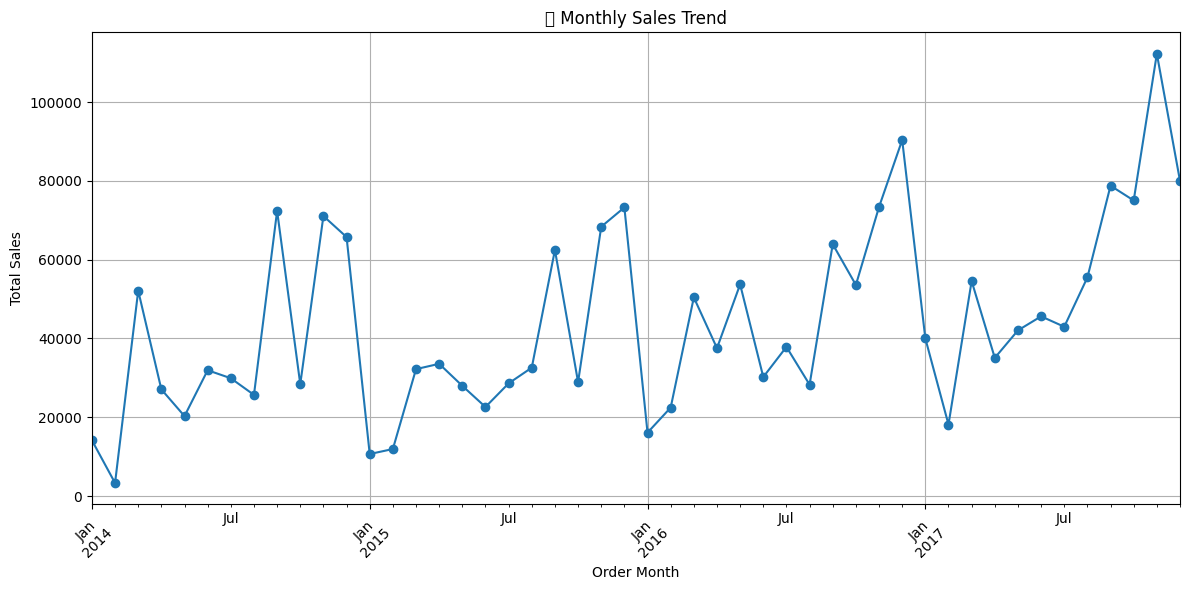

In [10]:
import matplotlib.pyplot as plt

monthly = df.groupby('Order_Month')['Sales'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly.plot(kind='line', marker='o')
plt.title('📅 Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


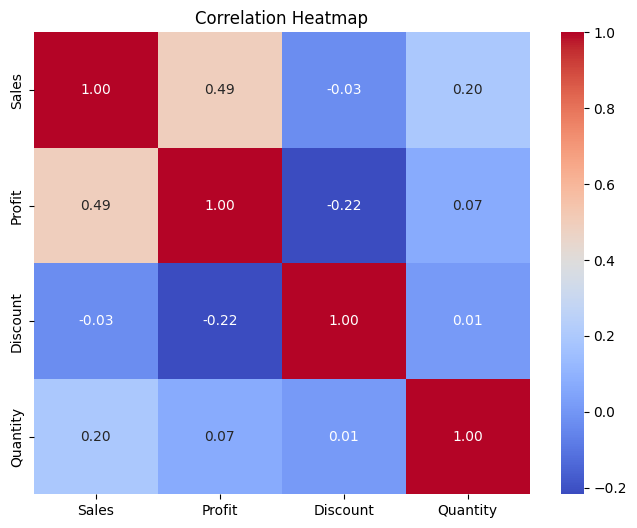

In [11]:
import seaborn as sns

# Correlation matrix
corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [14]:
import sqlite3
import pandas as pd

# Load your CSV into a DataFrame
df = pd.read_csv('/content/Cleaned_Superstore_Dates.csv')

# Create SQLite DB in memory or as a file
conn = sqlite3.connect('superstore.db')
df.to_sql('Superstore', conn, if_exists='replace', index=False)

# Run your SQL query
query = """
SELECT Category, Sub_Category,
       ROUND(SUM(Sales), 2) AS Total_Sales,
       ROUND(SUM(Profit), 2) AS Total_Profit,
       ROUND(SUM(Profit)/NULLIF(SUM(Sales),0)*100, 2) AS Profit_Margin
FROM Superstore
GROUP BY Category, Sub_Category
ORDER BY Profit_Margin;
"""

result = pd.read_sql_query(query, conn)

# Save result to CSV
result.to_csv('category_profitability.csv', index=False)
print("✅ Query results saved to category_profitability.csv")


✅ Query results saved to category_profitability.csv
